In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data_path = "rollingsales_bronx.xlsx"
df = pd.read_excel(data_path, header=4)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1.0,A1,0.0,2023-04-14
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3053,86,NaN,S0,2364 WASHINGTON AVENUE,NaN,...,1.0,2.0,3.0,1911.0,4080.0,1931.0,1.0,S0,0.0,2023-10-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26


In [8]:
# import re
# apt_no = df["ADDRESS"].split(" ")[0]
# apt_no

# for i in len(df):
#   df["ADDRESS"][i] = df["ADDRESS"][i].str.split(" ")[0][0]

# df
df["APARTMENT NUMBER"] = df["ADDRESS"].str.extract(r'(\d+)')

df

#Convert EASMENT to float (0.0)
df['EASEMENT'] = 0.0
df[df.isnull()]

dropped_columns_na = ["LAND SQUARE FEET","YEAR BUILT"]

dropped_df = df.dropna(subset=dropped_columns_na)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5610
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         3875 non-null   int64         
 1   NEIGHBORHOOD                    3875 non-null   object        
 2   BUILDING CLASS CATEGORY         3875 non-null   object        
 3   TAX CLASS AT PRESENT            3875 non-null   object        
 4   BLOCK                           3875 non-null   int64         
 5   LOT                             3875 non-null   int64         
 6   EASEMENT                        3875 non-null   float64       
 7   BUILDING CLASS AT PRESENT       3875 non-null   object        
 8   ADDRESS                         3875 non-null   object        
 9   APARTMENT NUMBER                3868 non-null   object        
 10  ZIP CODE                        3875 non-null   int64         
 11  RESIDENTI

In [9]:
df[df["LAND SQUARE FEET"].isnull()]
# df.info()

dropped_df["SALE PRICE"]

zero_sales = dropped_df[df["SALE PRICE"]!=0]
zero_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2397 entries, 0 to 5576
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         2397 non-null   int64         
 1   NEIGHBORHOOD                    2397 non-null   object        
 2   BUILDING CLASS CATEGORY         2397 non-null   object        
 3   TAX CLASS AT PRESENT            2397 non-null   object        
 4   BLOCK                           2397 non-null   int64         
 5   LOT                             2397 non-null   int64         
 6   EASEMENT                        2397 non-null   float64       
 7   BUILDING CLASS AT PRESENT       2397 non-null   object        
 8   ADDRESS                         2397 non-null   object        
 9   APARTMENT NUMBER                2393 non-null   object        
 10  ZIP CODE                        2397 non-null   int64         
 11  RESIDENTI

C:\Users\aaron.kipkoech.NVS\AppData\Local\Temp\ipykernel_26596\3530066364.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zero_sales = dropped_df[df["SALE PRICE"]!=0]


In [10]:
dups_list = ["NEIGHBORHOOD","BUILDING CLASS CATEGORY","BLOCK","LOT","BUILDING CLASS AT PRESENT","ADDRESS", "ZIP CODE"]
zero_sales["DUPS"] = zero_sales.duplicated(subset=dups_list)
zero_sales.head()

C:\Users\aaron.kipkoech.NVS\AppData\Local\Temp\ipykernel_26596\954027161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_sales["DUPS"] = zero_sales.duplicated(subset=dups_list)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,DUPS
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,0.0,A1,4453 PARK AVENUE,4453,...,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,215000.0,2023-04-18,False
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,0.0,A1,4453 PARK AVENUE,4453,...,0.0,1.0,1646.0,1497.0,1899.0,1.0,A1,570000.0,2023-08-23,True
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,0.0,B9,454 EAST 172 STREET,454,...,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,350000.0,2023-06-26,False
5,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,0.0,B9,454 EAST 172ND STREET,454,...,0.0,2.0,1658.0,1428.0,1901.0,1.0,B9,310000.0,2023-08-14,False
6,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,144,0.0,B1,3813 3 AVENUE,3813,...,0.0,2.0,2000.0,2400.0,1993.0,1.0,B1,763000.0,2023-09-07,False


In [11]:
# clean_df = zero_sales.drop_duplicates(subset=dups_list)
clean_df = zero_sales[zero_sales["DUPS"]== False]
clean_df['YEAR BUILT'] = clean_df['YEAR BUILT'].astype(int)
clean_df =clean_df[clean_df["TOTAL UNITS"] < 3.5]
# clean_df =clean_df[clean_df["SALE PRICE"] < 3000000]
clean_df =clean_df[clean_df["SALE PRICE"] < 1500000]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 5576
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         1965 non-null   int64         
 1   NEIGHBORHOOD                    1965 non-null   object        
 2   BUILDING CLASS CATEGORY         1965 non-null   object        
 3   TAX CLASS AT PRESENT            1965 non-null   object        
 4   BLOCK                           1965 non-null   int64         
 5   LOT                             1965 non-null   int64         
 6   EASEMENT                        1965 non-null   float64       
 7   BUILDING CLASS AT PRESENT       1965 non-null   object        
 8   ADDRESS                         1965 non-null   object        
 9   APARTMENT NUMBER                1961 non-null   object        
 10  ZIP CODE                        1965 non-null   int64         
 11  RESIDENTI

C:\Users\aaron.kipkoech.NVS\AppData\Local\Temp\ipykernel_26596\1177132309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['YEAR BUILT'] = clean_df['YEAR BUILT'].astype(int)


In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 5576
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         1965 non-null   int64         
 1   NEIGHBORHOOD                    1965 non-null   object        
 2   BUILDING CLASS CATEGORY         1965 non-null   object        
 3   TAX CLASS AT PRESENT            1965 non-null   object        
 4   BLOCK                           1965 non-null   int64         
 5   LOT                             1965 non-null   int64         
 6   EASEMENT                        1965 non-null   float64       
 7   BUILDING CLASS AT PRESENT       1965 non-null   object        
 8   ADDRESS                         1965 non-null   object        
 9   APARTMENT NUMBER                1961 non-null   object        
 10  ZIP CODE                        1965 non-null   int64         
 11  RESIDENTI

Visualize

<Axes: xlabel='SALE PRICE'>

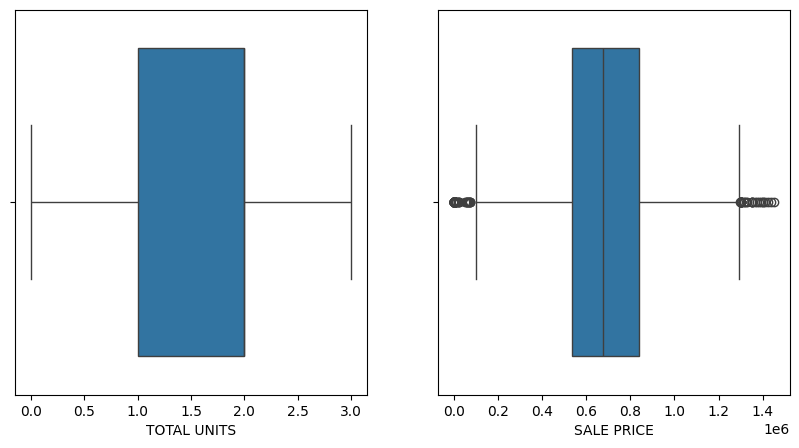

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.boxplot(x=clean_df['TOTAL UNITS'],ax=ax[0])
sns.boxplot(x=clean_df['SALE PRICE'],ax=ax[1])


<Axes: xlabel='SALE DATE', ylabel='SALE PRICE'>

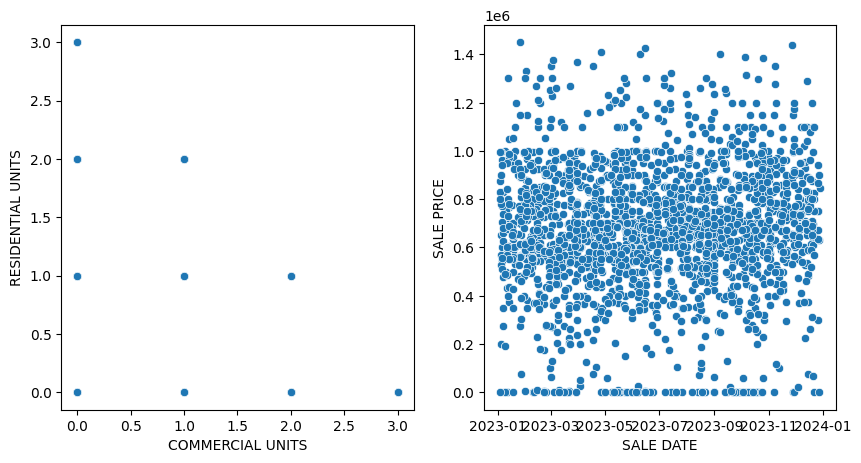

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.scatterplot(x=clean_df['COMMERCIAL UNITS'], y=clean_df["RESIDENTIAL UNITS"],ax=ax[0])
sns.scatterplot(x=clean_df['SALE DATE'], y=clean_df["SALE PRICE"],ax=ax[1])

In [15]:
# Create scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='YEAR BUILT', y='SALE PRICE', data=sum_by_year)
# plt.title('Scatter Plot of Year against Sum of Column')
# plt.xlabel('Year')
# plt.ylabel('Sum of Column')
# plt.show()